[0.5 0.5]


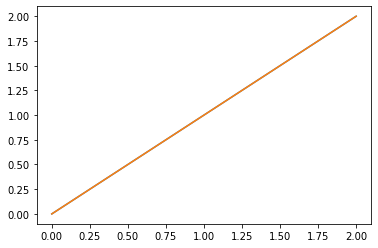

In [1]:
from sklearn import model_selection, linear_model
from matplotlib import pyplot

reg = linear_model.LinearRegression()  # Like R, reg should be a line
data = [[0, 0], [1, 1], [2, 2]]
target = [0, 1, 2]
reg.fit(data, target)

print(reg.coef_)

pyplot.plot(data, reg.predict(data))
#pyplot.show()

[0.44444444 0.44444444]


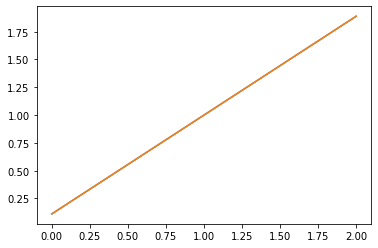

In [2]:
rig = linear_model.Ridge(alpha=0.5)
rig.fit(data, target)

print(rig.coef_)

pyplot.plot(data, rig.predict(data))

[0.49999975 0.49999975]


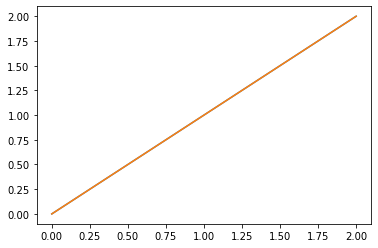

In [3]:
rigB = linear_model.BayesianRidge()  # It doesn't need alpha. It handles penalties or errors by itself.
rigB.fit(data, target)

print(rigB.coef_)
pyplot.plot(data, rigB.predict(data))

[0.34545455 0.34545455]


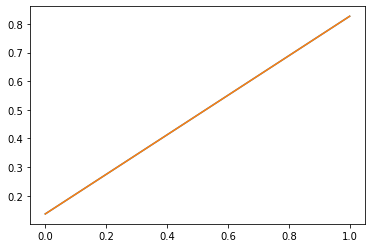

In [4]:
data2 = [[0, 0], [0, 0], [1, 1]]
target2 = [0, .1, 1]

rig.fit(data2, target2)
print(rig.coef_)
pyplot.plot(data2, rig.predict(data2))

[0.44186047 0.44186047]
0.1


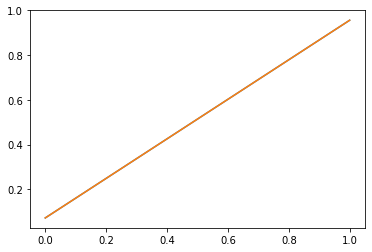

In [5]:
data2CV = [[0, 0], [0, 0], [1, 1]]
target2CV = [0, .1, 1]

rigCV = linear_model.RidgeCV()
rigCV.fit(data2CV, target2CV)

print(rigCV.coef_)
print(rigCV.alpha_)
pyplot.plot(data2CV, rigCV.predict(data2CV))

[0.47146402 0.47146402]
0.01


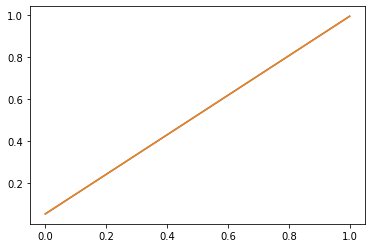

In [6]:
import numpy as np

rigCV = linear_model.RidgeCV(np.logspace(-6, 6, 13))  # from 0.000001 to 1000000 generate 13 such number
rigCV.fit(data2CV, target2CV)

print(rigCV.coef_)
print(rigCV.alpha_)
pyplot.plot(data2CV, rigCV.predict(data2CV))

[0.6 0. ]


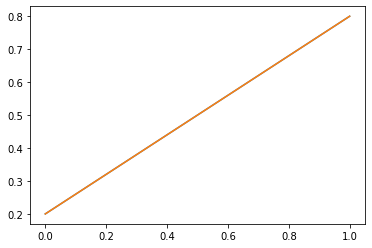

In [7]:
lasso = linear_model.Lasso(alpha=0.1)  # L1
data3 = [[0, 0], [1, 1]]
target3 = [0, 1]

lasso.fit(data3, target3)
print(lasso.coef_)
pyplot.plot(data3, lasso.predict(data3))

[0.71715729 0.        ]


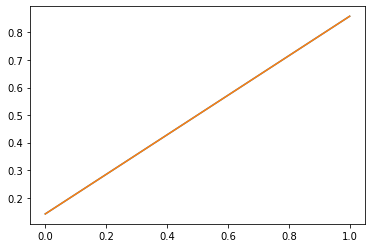

In [8]:
lassolars = linear_model.LassoLars(alpha=0.1)  

lassolars.fit(data3, target3)
print(lassolars.coef_)
pyplot.plot(data3, lassolars.predict(data3))

[0.38885627 0.38885627]


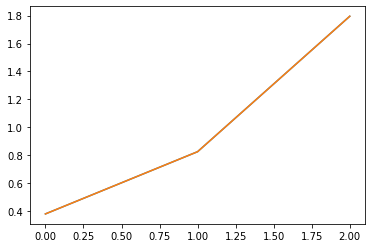

In [9]:
tr1 = linear_model.TweedieRegressor(power=1, alpha=0.5, link='log')
tr1.fit(data, target)
print(tr1.coef_)
pyplot.plot(data, tr1.predict(data))

[0.32695431 0.32695431]


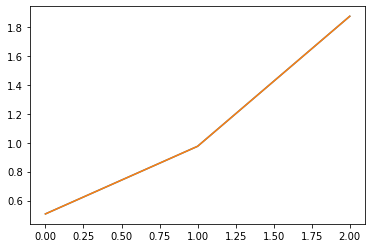

In [10]:
# power = 0: Normal distribution.Specific estimators such as Ridge, ElasticNet are generally more appropriate in this case.
# power = 1: Poisson distribution.PoissonRegressor is exposed for convenience.However, it is strictly equivalent to TweedieRegressor(power=1, link='log').
# power = 2: Gamma distribution.GammaRegressor is exposed for convenience.However, it is strictly equivalent to TweedieRegressor(power=2, link='log').
# power = 3: Inverse Gaussian distribution.

tr0 = linear_model.TweedieRegressor(power=0, alpha=0.5,
                                    link='log')  # unlink power = 1 or 2, it is not equivalent to Ridge(alpha=0.5)
tr0.fit(data, target)
print(tr0.coef_)
pyplot.plot(data, tr0.predict(data))

PolynomialFeatures()
[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[0 1 1 0]
[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]
[[1 0 0 0 0 0]
 [1 0 1 0 0 1]
 [1 1 0 1 0 0]
 [1 1 1 1 1 1]]
[0 1 1 0]
[[1 0 0 2 0 0 0]
 [1 0 1 3 0 0 3]
 [1 1 0 4 0 4 0]
 [1 1 1 5 1 5 5]]
[[ 1  0  0  2  0  0  0  0  0  4]
 [ 1  0  1  3  0  0  0  1  3  9]
 [ 1  1  0  4  1  0  4  0  0 16]
 [ 1  1  1  5  1  1  5  1  5 25]]


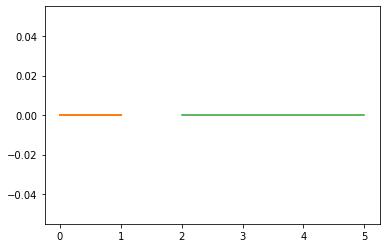

In [11]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(degree=2)

# fit first, then transform, otherwise X cannot be printable 
print(poly.fit(X))
print(X)
print(poly.transform(X))

# can also put them together:
#print(poly.fit_transform(X))

tmp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = tmp[:, 0] ^ tmp[:, 1]

print(Y)

print(PolynomialFeatures(interaction_only=True).fit_transform(tmp).astype(int))
print(PolynomialFeatures().fit_transform(tmp).astype(int)) # default degree = 2

tmp = np.array([[0, 0, 2], [0, 1, 3], [1, 0, 4], [1, 1, 5]])
Y = tmp[:, 0] ^ tmp[:, 1]

print(Y)

#interaction_only=True : only want to know if elements interact with each other.
print(PolynomialFeatures(interaction_only=True).fit_transform(tmp).astype(int)) # even didn't explicitly say, but its degree can in fact be at most 2

# know everyhing, up to the degree
print(PolynomialFeatures().fit_transform(tmp).astype(int)) # default degree = 2

tmp2 = tmp[:, 0:2]
clf = linear_model.Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(tmp, Y)
pyplot.plot(tmp, clf.predict(tmp))

In [12]:
from sklearn.pipeline import Pipeline

model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), ('linear', linear_model.LinearRegression(fit_intercept=False))])

A = np.arange(5)
B = 3 - 2 * A ** 2 - A ** 3

model = model.fit(A[:, np.newaxis], B)
print(model.named_steps['linear'].coef_)


[ 3.00000000e+00  1.13242749e-14 -2.00000000e+00 -1.00000000e+00]


In [15]:
    # A linear classifier optimized by the SGD. It can define what Machine Learning Model ('loss' function) to use,
    # which will be optimized by SGD (i.e: Logical Regression optimized by SGD)
    sgd = linear_model.SGDClassifier(loss="hinge",
                                     penalty="l2",  # Ridge?
                                     max_iter=2000)

    sgd.fit(data, target)

    print(sgd.predict([[100000, -100]]))
    print(reg.predict([[100000, -100]]))

[2]
[49950.]
